In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import math
from matplotlib import pyplot as plt
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

path="/gdrive/My Drive/desafio A3Data/Customer-Churn-Customer-Churn.csv"

Mounted at /gdrive


In [2]:
df = pd.read_csv(path)
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7569-NMZYQ,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),"118,75","8672,45",No
1,8984-HPEMB,Female,0,No,No,71,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,"118,65","8477,6",No
2,5989-AXPUC,Female,0,Yes,No,68,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Mailed check,"118,6","7990,05",No
3,5734-EJKXG,Female,0,No,No,61,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,"118,6","7365,7",No
4,8199-ZLLSA,Male,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),"118,35","7804,15",Yes


In [ ]:
df.dtypes

customerID          object
gender              object
SeniorCitizen        int64
Partner             object
Dependents          object
tenure               int64
PhoneService        object
MultipleLines       object
InternetService     object
OnlineSecurity      object
OnlineBackup        object
DeviceProtection    object
TechSupport         object
StreamingTV         object
StreamingMovies     object
Contract            object
PaperlessBilling    object
PaymentMethod       object
MonthlyCharges      object
TotalCharges        object
Churn               object
dtype: object

In [3]:
df["TotalCharges"] = df["TotalCharges"].replace(",", ".", regex=True).astype(float)
df["MonthlyCharges"] = df["MonthlyCharges"].replace(",", ".", regex=True).astype(float)
df["tenure"] = df["tenure"].astype(float)

In [4]:
total_clients = df.Churn.count()
total_clients

7043

In [5]:
churn = df[df.Churn =="Yes"]
no_churn = df[df.Churn =="No"]

df.Churn.value_counts(normalize=True) * 100

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

In [113]:
print("Montly charge analysis")
print(churn.MonthlyCharges.mean())
print(no_churn.MonthlyCharges.mean())

print("Total charge analysis")
print(churn.TotalCharges.mean())
print(no_churn.TotalCharges.mean())

Montly charge analysis
74.44133226324237
61.26512369540008
Total charge analysis
1531.7960941680044
2555.344141003293


In [79]:
total_churn = churn.SeniorCitizen.count()
total_no_churn = no_churn.SeniorCitizen.count()

In [80]:
churn.SeniorCitizen.value_counts(normalize=True) * 100

SeniorCitizen
0    74.531835
1    25.468165
Name: proportion, dtype: float64

In [81]:
print(no_churn.Dependents.value_counts(normalize=True) * 100)
print(churn.Dependents.value_counts(normalize=True) * 100)

Dependents
No     65.519907
Yes    34.480093
Name: proportion, dtype: float64
Dependents
No     82.557517
Yes    17.442483
Name: proportion, dtype: float64


In [82]:
print("Churn with partner")
print(churn.Partner.value_counts(normalize=True) * 100)

print("No churn with partner")
print(no_churn.Partner.value_counts(normalize=True) * 100)

Churn with partner
Partner
No     64.205457
Yes    35.794543
Name: proportion, dtype: float64
No churn with partner
Partner
Yes    52.821801
No     47.178199
Name: proportion, dtype: float64


In [83]:
print(churn.Contract.value_counts(normalize=True) * 100)

Contract
Month-to-month    88.550027
One year           8.881755
Two year           2.568218
Name: proportion, dtype: float64


In [84]:
print(churn.PaymentMethod.value_counts(normalize=True) * 100)

PaymentMethod
Electronic check             57.303371
Mailed check                 16.479401
Bank transfer (automatic)    13.804173
Credit card (automatic)      12.413055
Name: proportion, dtype: float64


In [85]:
print(churn.MultipleLines.value_counts(normalize=True) * 100)

MultipleLines
Yes                 45.478866
No                  45.425361
No phone service     9.095773
Name: proportion, dtype: float64


In [86]:
print(churn.PhoneService.value_counts(normalize=True) * 100)

PhoneService
Yes    90.904227
No      9.095773
Name: proportion, dtype: float64


In [87]:
print(churn.StreamingMovies.value_counts(normalize=True) * 100)
print(churn.StreamingTV.value_counts(normalize=True) * 100)

StreamingMovies
No                     50.187266
Yes                    43.766720
No internet service     6.046014
Name: proportion, dtype: float64
StreamingTV
No                     50.401284
Yes                    43.552702
No internet service     6.046014
Name: proportion, dtype: float64


In [88]:
churn.InternetService.value_counts(normalize=True) * 100

InternetService
Fiber optic    69.395399
DSL            24.558587
No              6.046014
Name: proportion, dtype: float64

In [89]:
#with phone service
churn_phone_s = churn[churn.PhoneService == 'Yes']
churn_phone_s.InternetService.value_counts(normalize=True) * 100

InternetService
Fiber optic    76.339023
DSL            17.010006
No              6.650971
Name: proportion, dtype: float64

In [90]:
#without phone service
churn_no_phone = churn[churn.PhoneService == 'No']
churn_no_phone.InternetService.value_counts(normalize=True) * 100

InternetService
DSL    100.0
Name: proportion, dtype: float64

In [91]:
print(no_churn.StreamingMovies.value_counts(normalize=True) * 100)
print(no_churn.StreamingTV.value_counts(normalize=True) * 100)

StreamingMovies
Yes                    36.992656
No                     35.697719
No internet service    27.309625
Name: proportion, dtype: float64
StreamingTV
Yes                    36.586780
No                     36.103595
No internet service    27.309625
Name: proportion, dtype: float64


In [92]:
churn.TechSupport.value_counts(normalize=True) * 100

TechSupport
No                     77.367576
Yes                    16.586410
No internet service     6.046014
Name: proportion, dtype: float64

In [ ]:
churn["SeniorCitizen"] = churn["SeniorCitizen"].replace(to_replace=[0, 1], value=["No", "Yes"])
churn["InternetService"] = churn["InternetService"].replace(to_replace=["Fiber optic"], value=["Fiber"])
churn["Contract"] = churn["Contract"].replace(to_replace=["Month-to-month", "One year", "Two year"], value=["M", "1Y", "2Y"])

no_churn["SeniorCitizen"] = no_churn["SeniorCitizen"].replace(to_replace=[0, 1], value=["No", "Yes"])
no_churn["InternetService"] = no_churn["InternetService"].replace(to_replace=["Fiber optic"], value=["Fiber"])
no_churn["Contract"] = no_churn["Contract"].replace(to_replace=["Month-to-month", "One year", "Two year"], value=["M", "1Y", "2Y"])

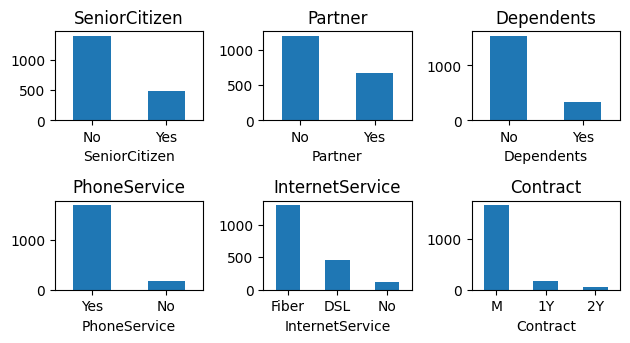

In [11]:
df_columns_only = churn[['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'InternetService',
                            'Contract']]
size = math.ceil(df_columns_only.shape[1]** (1/2))
fig = plt.figure()

for i, col in enumerate(df_columns_only.columns):
    fig.add_subplot(size, size, i + 1)
    df_columns_only[col].value_counts().plot(kind="bar", ax=plt.gca(), title=col, rot=0)

fig.tight_layout()

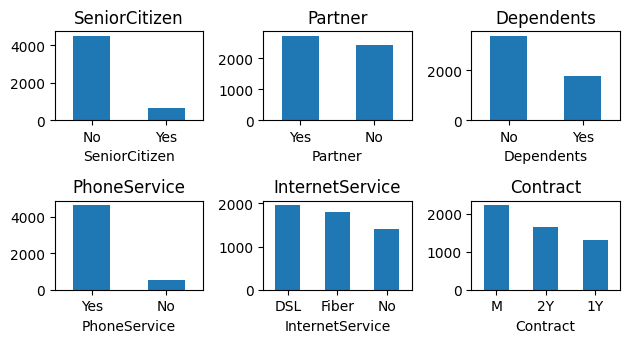

In [12]:
df_columns_only = no_churn[['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'InternetService',
                            'Contract']]
size = math.ceil(df_columns_only.shape[1]** (1/2))
fig = plt.figure()

for i, col in enumerate(df_columns_only.columns):
    fig.add_subplot(size, size, i + 1)
    df_columns_only[col].value_counts().plot(kind="bar", ax=plt.gca(), title=col, rot=0)

fig.tight_layout()